In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns


### Importing results from each model

In [3]:
results_ARIMA = pd.read_csv('results_ARIMA.csv')
results_SARIMA_exogenous = pd.read_csv('results_SARIMA_exogenous.csv')
results_Prophet = pd.read_csv('results_prophet_exogenous.csv')
results_SARIMA= pd.read_csv('results_SARIMA.CSV')

In [4]:
results_ARIMA.head()

,Unnamed: 0,Actual,ARIMA
0,2017-10-01,21,26.421687
1,2017-10-02,12,21.120660
2,2017-10-03,18,21.342084
3,2017-10-04,15,24.506238
4,2017-10-05,20,23.933197


In [10]:
results_ARIMA.shape

(92, 3)

In [5]:
results_SARIMA.head()

,Unnamed: 0,Actual,SARIMA (weekly),SARIMA (Yearly),SARIMAX_wy_Fourier,SARIMAX (Walk-Forward)
0,2017-10-01,21,28.163247,24.846157,26.925491,27.200808
1,2017-10-02,12,19.857715,26.003381,18.200592,17.970798
2,2017-10-03,18,22.623073,19.999926,20.933126,20.664465
3,2017-10-04,15,23.417735,28.000002,22.454429,21.610142
4,2017-10-05,20,24.080831,17.000000,23.091248,21.751867


In [11]:
results_SARIMA.shape

(92, 6)

In [12]:
print(results_Prophet.head())
print(results_Prophet.shape)

           ds  Actual  Prophet_Exogenous
0  2017-10-01      21          20.652185
1  2017-10-02      12          17.074962
2  2017-10-03      18          18.135811
3  2017-10-04      15          19.166719
4  2017-10-05      20          19.238957
(92, 3)


In [13]:
print(results_SARIMA_exogenous.head())
print(results_SARIMA_exogenous.shape)

         date  Actual  SARIMAX_exogenous  SARIMAX_Walk-Forward_exogenous
0  2017-10-01      21          20.873390                       20.873390
1  2017-10-02      12          17.523655                       17.501732
2  2017-10-03      18          18.730193                       18.505962
3  2017-10-04      15          19.284352                       18.889692
4  2017-10-05      20          19.817043                       19.353821
(92, 4)


In [14]:
results_ARIMA.dtypes

Unnamed: 0     object
Actual          int64
ARIMA         float64
dtype: object

In [15]:
results_ARIMA['date']=pd.to_datetime(results_ARIMA['Unnamed: 0'])

In [17]:
results_ARIMA.drop('Unnamed: 0', axis=1, inplace=True)
results_ARIMA.set_index('date', inplace=True)
results_ARIMA.head()

,Actual,ARIMA
date,,
2017-10-01,21,26.421687
2017-10-02,12,21.120660
2017-10-03,18,21.342084
2017-10-04,15,24.506238
2017-10-05,20,23.933197


In [20]:
results_SARIMA['date']=results_ARIMA.index
results_SARIMA.drop('Unnamed: 0', axis=1, inplace=True)

In [22]:
results_SARIMA.set_index('date', inplace=True)
results_SARIMA.head()

,Actual,SARIMA (weekly),SARIMA (Yearly),SARIMAX_wy_Fourier,SARIMAX (Walk-Forward)
date,,,,,
2017-10-01,21,28.163247,24.846157,26.925491,27.200808
2017-10-02,12,19.857715,26.003381,18.200592,17.970798
2017-10-03,18,22.623073,19.999926,20.933126,20.664465
2017-10-04,15,23.417735,28.000002,22.454429,21.610142
2017-10-05,20,24.080831,17.000000,23.091248,21.751867


In [23]:
results_Prophet['date']=pd.to_datetime(results_Prophet['ds'])

In [25]:
results_Prophet.drop('ds', axis=1, inplace=True)
results_Prophet.set_index('date',inplace=True)
results_Prophet.head()

,Actual,Prophet_Exogenous
date,,
2017-10-01,21,20.652185
2017-10-02,12,17.074962
2017-10-03,18,18.135811
2017-10-04,15,19.166719
2017-10-05,20,19.238957


In [26]:
results_SARIMA_exogenous.set_index('date', inplace=True)
results_SARIMA_exogenous.head()

,Actual,SARIMAX_exogenous,SARIMAX_Walk-Forward_exogenous
date,,,
2017-10-01,21,20.873390,20.873390
2017-10-02,12,17.523655,17.501732
2017-10-03,18,18.730193,18.505962
2017-10-04,15,19.284352,18.889692
2017-10-05,20,19.817043,19.353821


In [28]:
results = pd.concat([results_ARIMA, results_SARIMA, results_SARIMA_exogenous, results_Prophet], axis = 1)

In [30]:
results.drop('Actual', axis=1, inplace=True)
results.head()

,ARIMA,SARIMA (weekly),SARIMA (Yearly),SARIMAX_wy_Fourier,SARIMAX (Walk-Forward),SARIMAX_exogenous,SARIMAX_Walk-Forward_exogenous,Prophet_Exogenous
date,,,,,,,,
2017-10-01,26.421687,28.163247,24.846157,26.925491,27.200808,20.873390,20.873390,20.652185
2017-10-02,21.120660,19.857715,26.003381,18.200592,17.970798,17.523655,17.501732,17.074962
2017-10-03,21.342084,22.623073,19.999926,20.933126,20.664465,18.730193,18.505962,18.135811
2017-10-04,24.506238,23.417735,28.000002,22.454429,21.610142,19.284352,18.889692,19.166719
2017-10-05,23.933197,24.080831,17.000000,23.091248,21.751867,19.817043,19.353821,19.238957


In [206]:
results['Actual']=results_ARIMA['Actual']
results.head()

,ARIMA,SARIMA (weekly),SARIMA (Yearly),SARIMAX_wy_Fourier,SARIMAX (Walk-Forward),SARIMAX_exogenous,SARIMAX_Walk-Forward_exogenous,Prophet_Exogenous,Actual
date,,,,,,,,,
2017-10-01,26.421687,28.163247,24.846157,26.925491,27.200808,20.873390,20.873390,20.652185,21
2017-10-02,21.120660,19.857715,26.003381,18.200592,17.970798,17.523655,17.501732,17.074962,12
2017-10-03,21.342084,22.623073,19.999926,20.933126,20.664465,18.730193,18.505962,18.135811,18
2017-10-04,24.506238,23.417735,28.000002,22.454429,21.610142,19.284352,18.889692,19.166719,15
2017-10-05,23.933197,24.080831,17.000000,23.091248,21.751867,19.817043,19.353821,19.238957,20


In [207]:
forecast= results.iloc[:,:-1]

In [208]:
forecast

,ARIMA,SARIMA (weekly),SARIMA (Yearly),SARIMAX_wy_Fourier,SARIMAX (Walk-Forward),SARIMAX_exogenous,SARIMAX_Walk-Forward_exogenous,Prophet_Exogenous
date,,,,,,,,
2017-10-01,26.421687,28.163247,24.846157,26.925491,27.200808,20.873390,20.873390,20.652185
2017-10-02,21.120660,19.857715,26.003381,18.200592,17.970798,17.523655,17.501732,17.074962
2017-10-03,21.342084,22.623073,19.999926,20.933126,20.664465,18.730193,18.505962,18.135811
2017-10-04,24.506238,23.417735,28.000002,22.454429,21.610142,19.284352,18.889692,19.166719
2017-10-05,23.933197,24.080831,17.000000,23.091248,21.751867,19.817043,19.353821,19.238957
...,...,...,...,...,...,...,...,...
2017-12-27,25.094284,24.026573,10.000000,16.932845,16.295785,15.394398,15.737793,13.003413
2017-12-28,24.656710,24.651830,16.000000,17.919910,17.515696,15.665729,16.210019,14.600263
2017-12-29,26.013510,26.362679,21.000000,19.410636,18.414394,16.010017,15.828557,14.684450


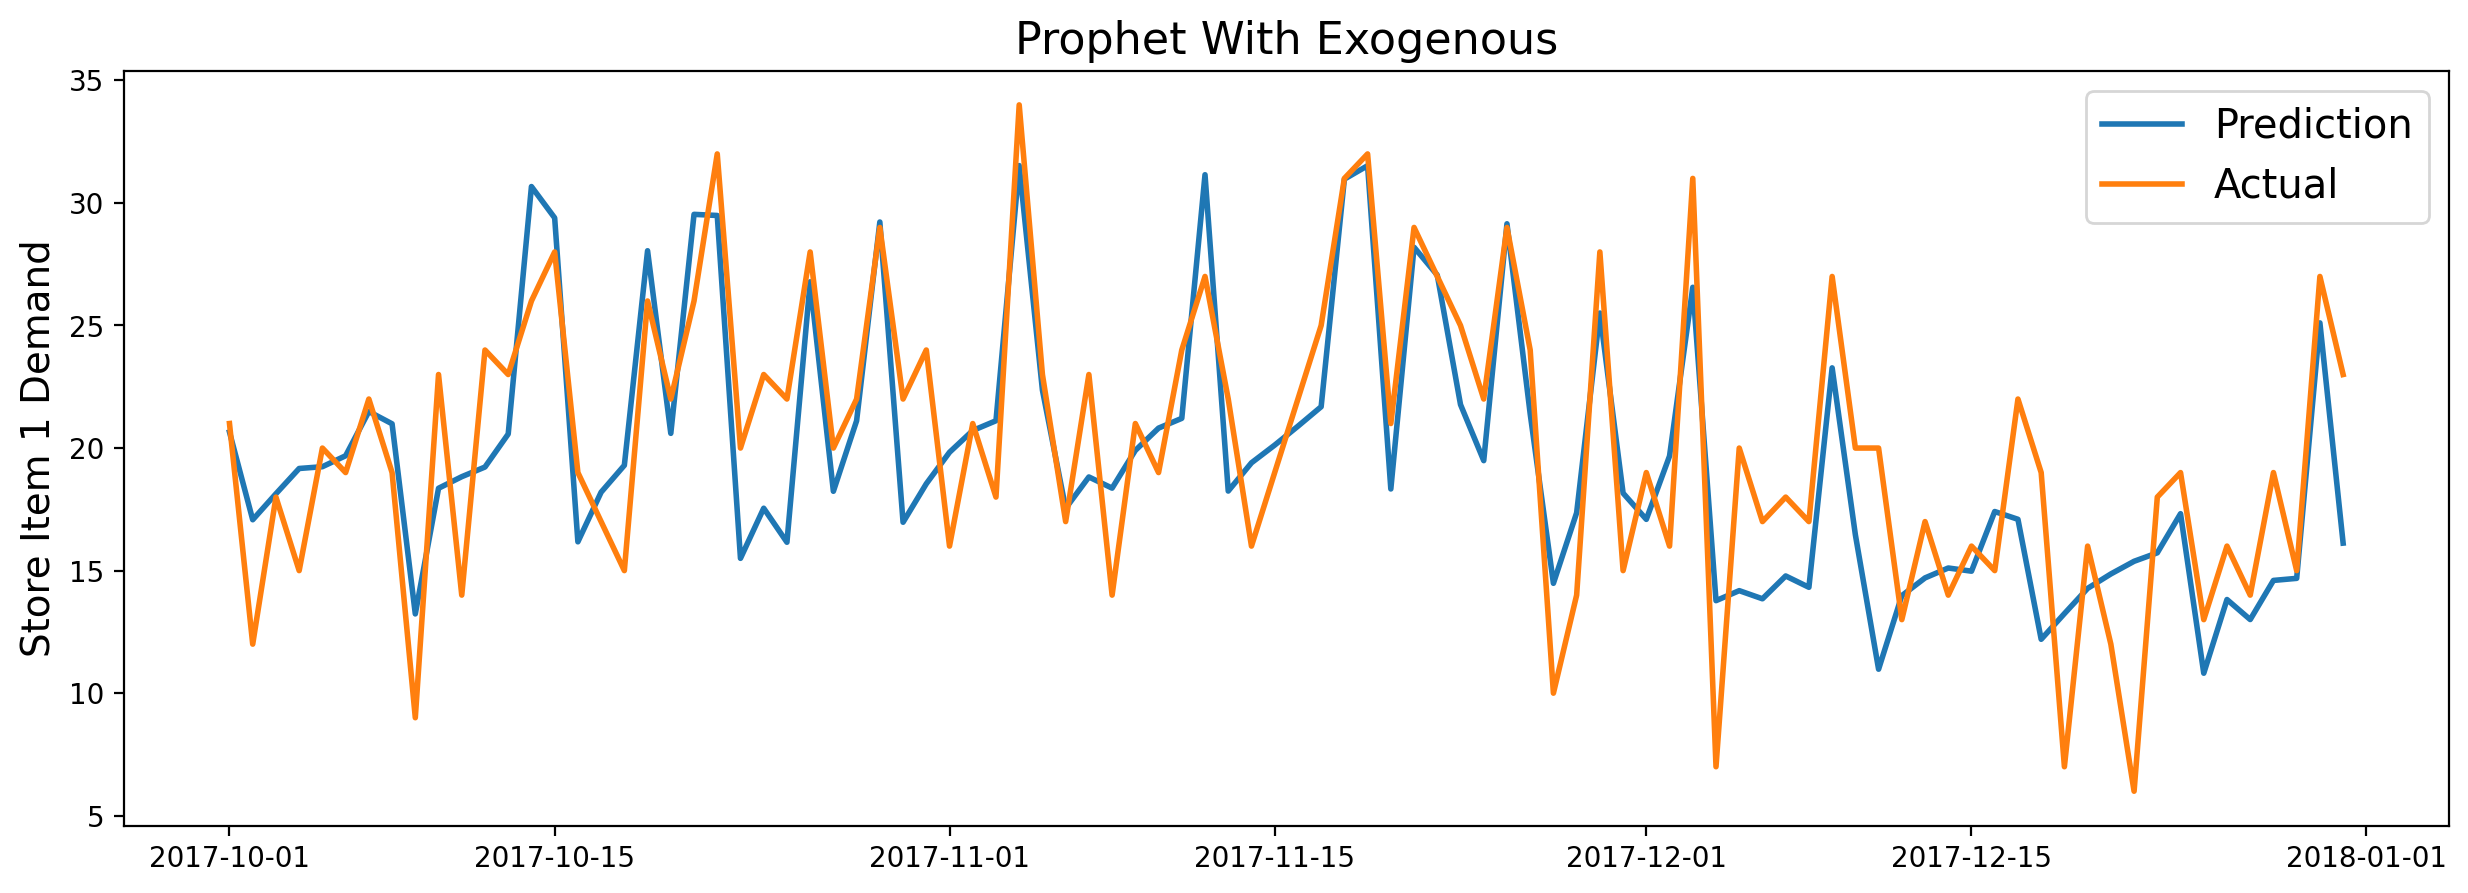

In [216]:
plt.figure(figsize = (15,5))
plt.plot(results['Prophet_Exogenous'], linewidth = 2)
plt.plot(results['Actual'], linewidth = 2)
plt.title('Prophet With Exogenous', fontsize = 16)
plt.ylabel('Store Item 1 Demand', fontsize = 14)
plt.legend(['Prediction', 'Actual'], fontsize = 'x-large')
#plt.savefig('SARIMA_365.png')
plt.show()

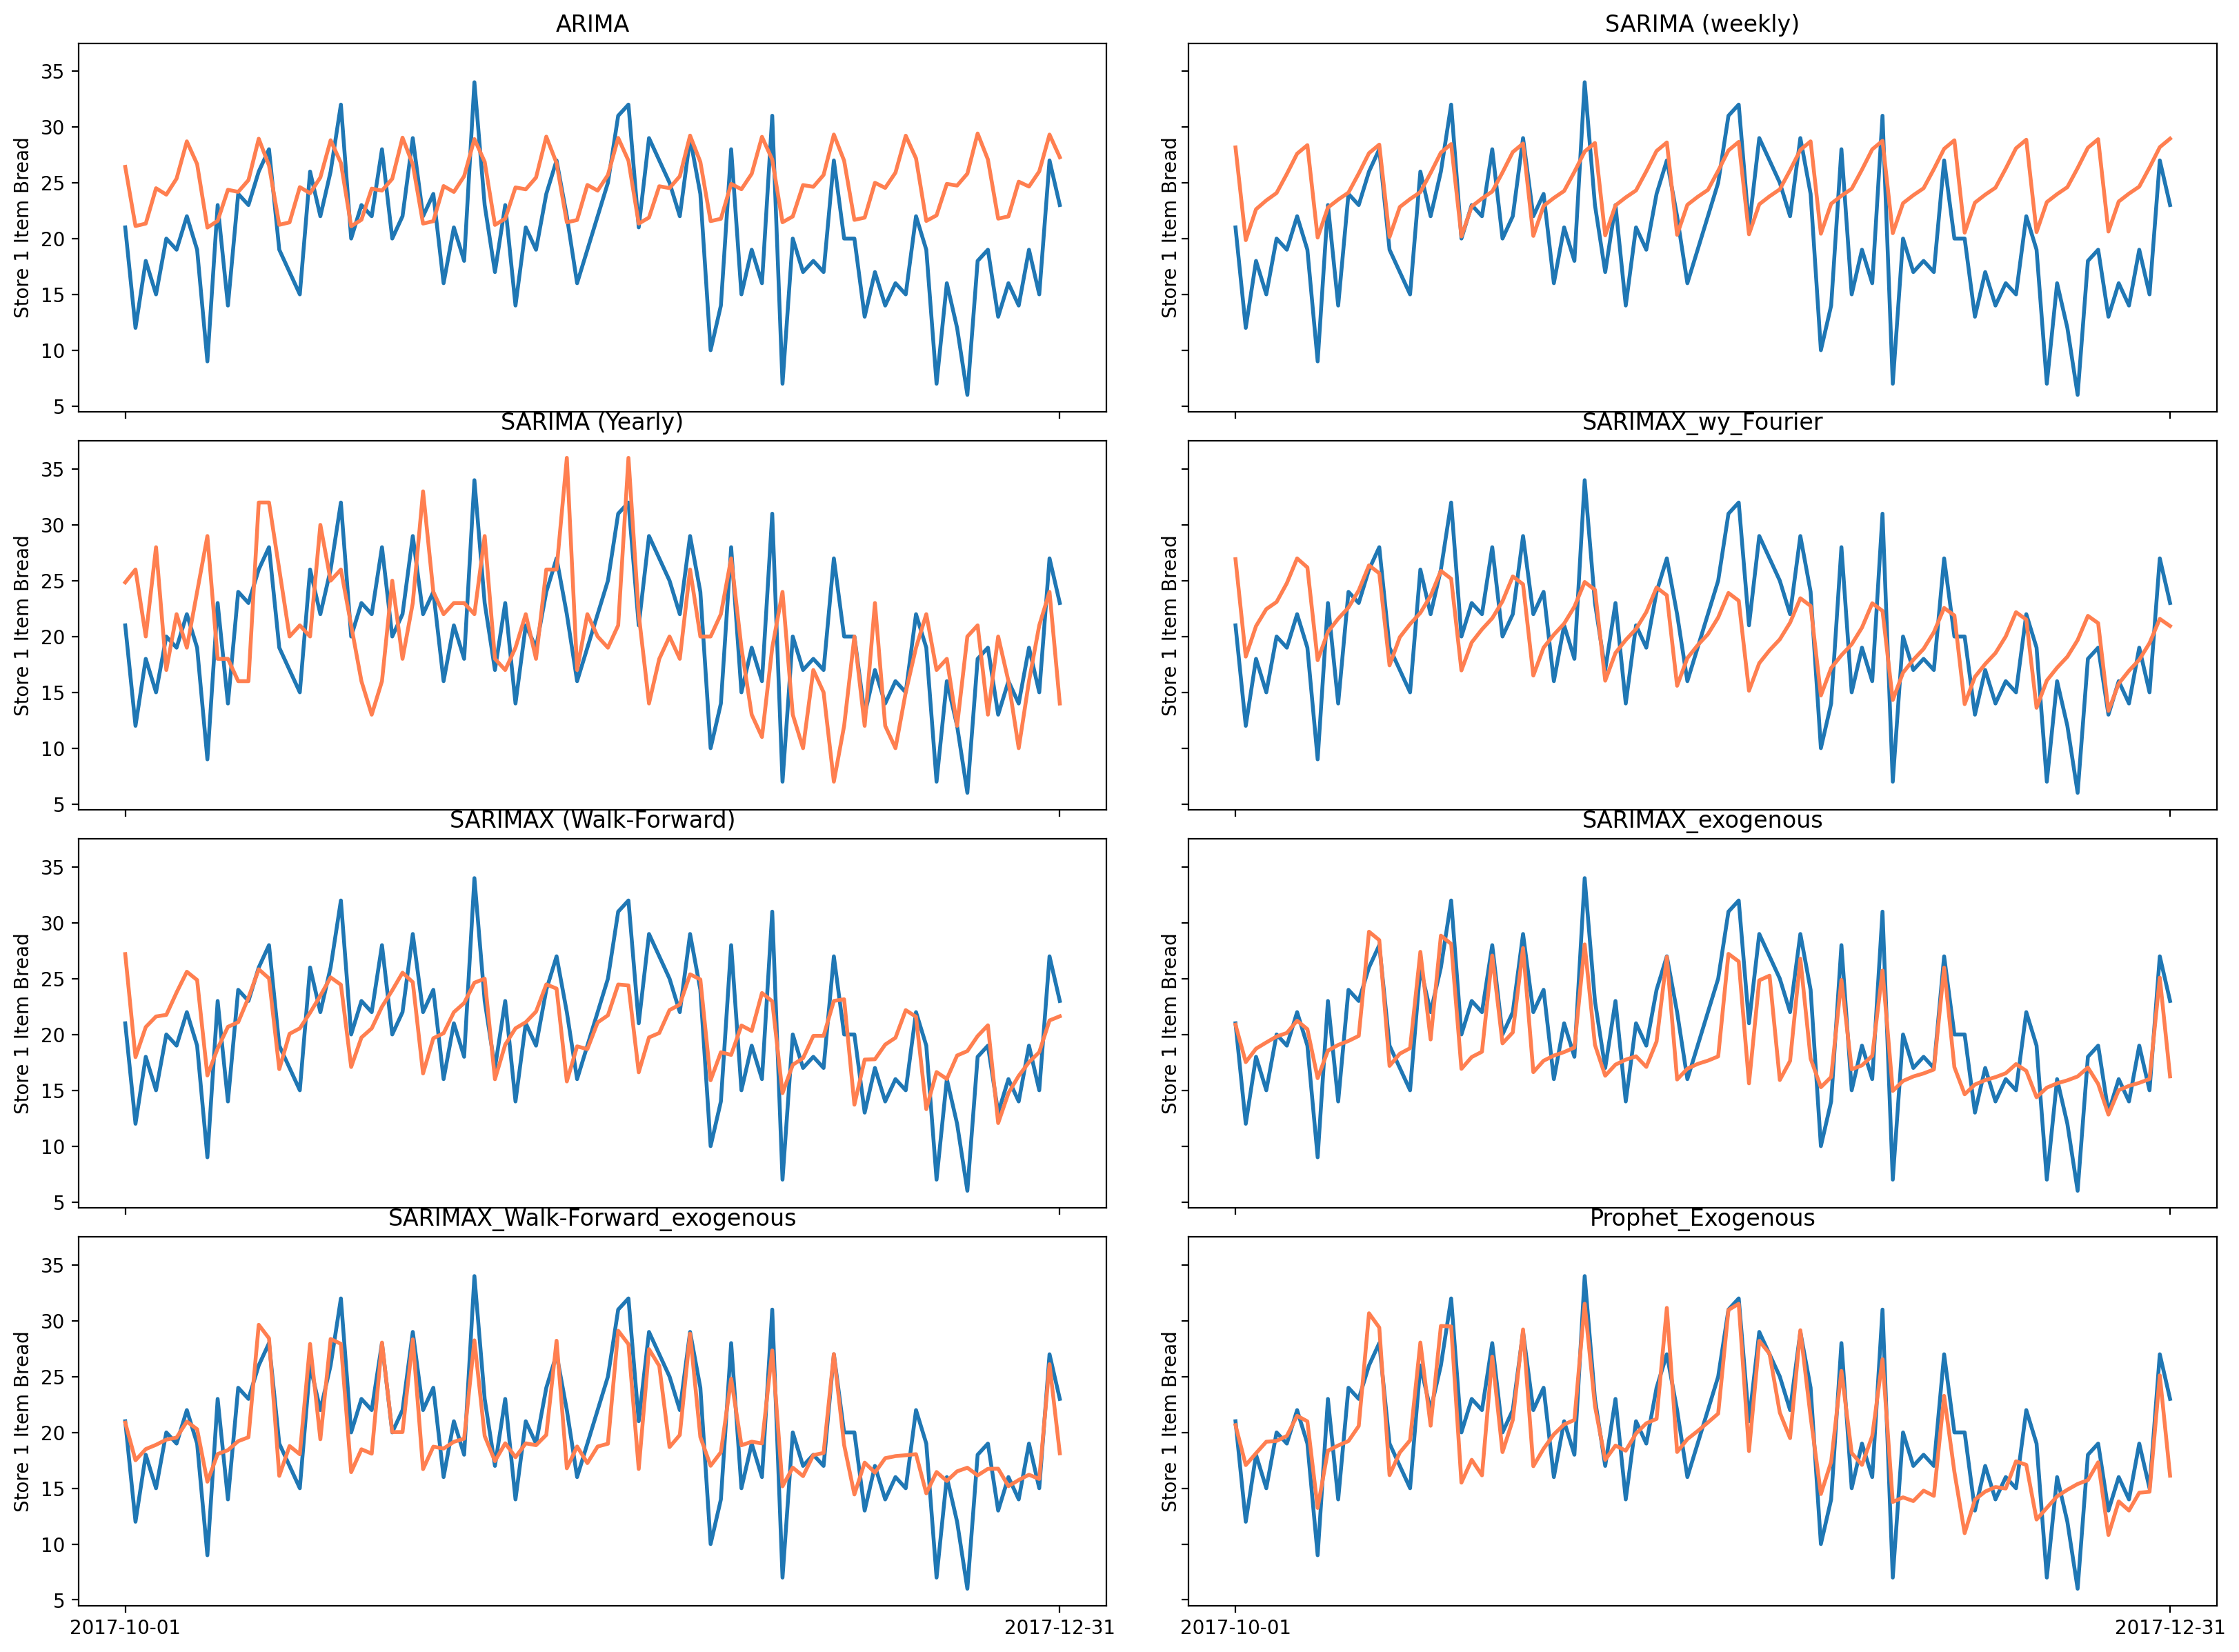

In [209]:
#plt.rcParams['figure.dpi']=200
fig, ax = plt.subplots(4,2, sharex=True, sharey=True, figsize= (20,15))
fig.subplots_adjust(wspace=0.08)
fig.subplots_adjust(hspace=0.08)
start = results.index[0]
end = results.index[-1]

for ax, forecast in zip(ax.flatten(), forecast):
    ax.plot(results['Actual'], linewidth = 2, label = 'Actual')
    ax.plot(results[forecast], linewidth = 2, label = forecast, c='coral')
    ax.set_title(forecast)
    #plt.legend(fontsize = 'x-large')
    plt.xticks([start,end])
    ax.set_ylabel('Store 1 Item Bread')

### Evaluation by metrics

In [127]:
#############################################
#         evaluation function               #
#############################################
#Evaluation metrics
from sklearn.metrics import r2_score
# MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true+1.))) * 100

In [128]:
actual = results['Actual']
predict = results.drop('Actual', axis = 1)

In [141]:
actual=pd.DataFrame(actual)
actual.set_index(predict.index, inplace=True)

In [142]:
actual

,Actual
date,
2017-10-01,21
2017-10-02,12
2017-10-03,18
2017-10-04,15
2017-10-05,20
...,...
2017-12-27,14
2017-12-28,19
2017-12-29,15


In [136]:
predict

,ARIMA,SARIMA (weekly),SARIMA (Yearly),SARIMAX_wy_Fourier,SARIMAX (Walk-Forward),SARIMAX_exogenous,SARIMAX_Walk-Forward_exogenous,Prophet_Exogenous
date,,,,,,,,
2017-10-01,26.421687,28.163247,24.846157,26.925491,27.200808,20.873390,20.873390,20.652185
2017-10-02,21.120660,19.857715,26.003381,18.200592,17.970798,17.523655,17.501732,17.074962
2017-10-03,21.342084,22.623073,19.999926,20.933126,20.664465,18.730193,18.505962,18.135811
2017-10-04,24.506238,23.417735,28.000002,22.454429,21.610142,19.284352,18.889692,19.166719
2017-10-05,23.933197,24.080831,17.000000,23.091248,21.751867,19.817043,19.353821,19.238957
...,...,...,...,...,...,...,...,...
2017-12-27,25.094284,24.026573,10.000000,16.932845,16.295785,15.394398,15.737793,13.003413
2017-12-28,24.656710,24.651830,16.000000,17.919910,17.515696,15.665729,16.210019,14.600263
2017-12-29,26.013510,26.362679,21.000000,19.410636,18.414394,16.010017,15.828557,14.684450


In [178]:
predict.columns

Index(['ARIMA', 'SARIMA (weekly)', 'SARIMA (Yearly)', 'SARIMAX_wy_Fourier',
       'SARIMAX (Walk-Forward)', 'SARIMAX_exogenous',
       'SARIMAX_Walk-Forward_exogenous', 'Prophet_Exogenous'],
      dtype='object')

In [143]:
actual

,Actual
date,
2017-10-01,21
2017-10-02,12
2017-10-03,18
2017-10-04,15
2017-10-05,20
...,...
2017-12-27,14
2017-12-28,19
2017-12-29,15


In [182]:
table = pd.DataFrame({'Model': predict.columns})
mape_list = []
r2_list = []
rmse_list = []
mae_list = []

for column in predict.columns:
    mape = mean_absolute_percentage_error(actual.Actual, predict[column])
    r2 = r2_score(actual.Actual, predict[column])
    rmse=sqrt(mean_squared_error(actual.Actual, predict[column]))
    mape_list.append(mape)
    r2_list.append(r2)
    rmse_list.append(rmse)
    

table['MAPE (%)'] = mape_list
table['R2 Score'] = r2_list
table['RMSE']=rmse_list

#table['Color'] = ['pink', 'orange', 'green', 'grey', 'brown', 'red', 'blue', 'indigo', 'magenta']
table

,Model,MAPE (%),R2 Score,RMSE
0,ARIMA,36.155410,-0.451963,7.017390
1,SARIMA (weekly),35.672918,-0.429280,6.962360
2,SARIMA (Yearly),31.511018,-0.498903,7.129918
3,SARIMAX_wy_Fourier,22.904607,0.266205,4.988673
4,SARIMAX (Walk-Forward),22.394449,0.328045,4.773841
5,SARIMAX_exogenous,17.760725,0.555512,3.882645
6,SARIMAX_Walk-Forward_exogenous,17.646272,0.602823,3.670199
7,Prophet_Exogenous,16.608320,0.634569,3.520470


In [185]:
mape = table.sort_values(by=['MAPE (%)','RMSE'], ascending=True)

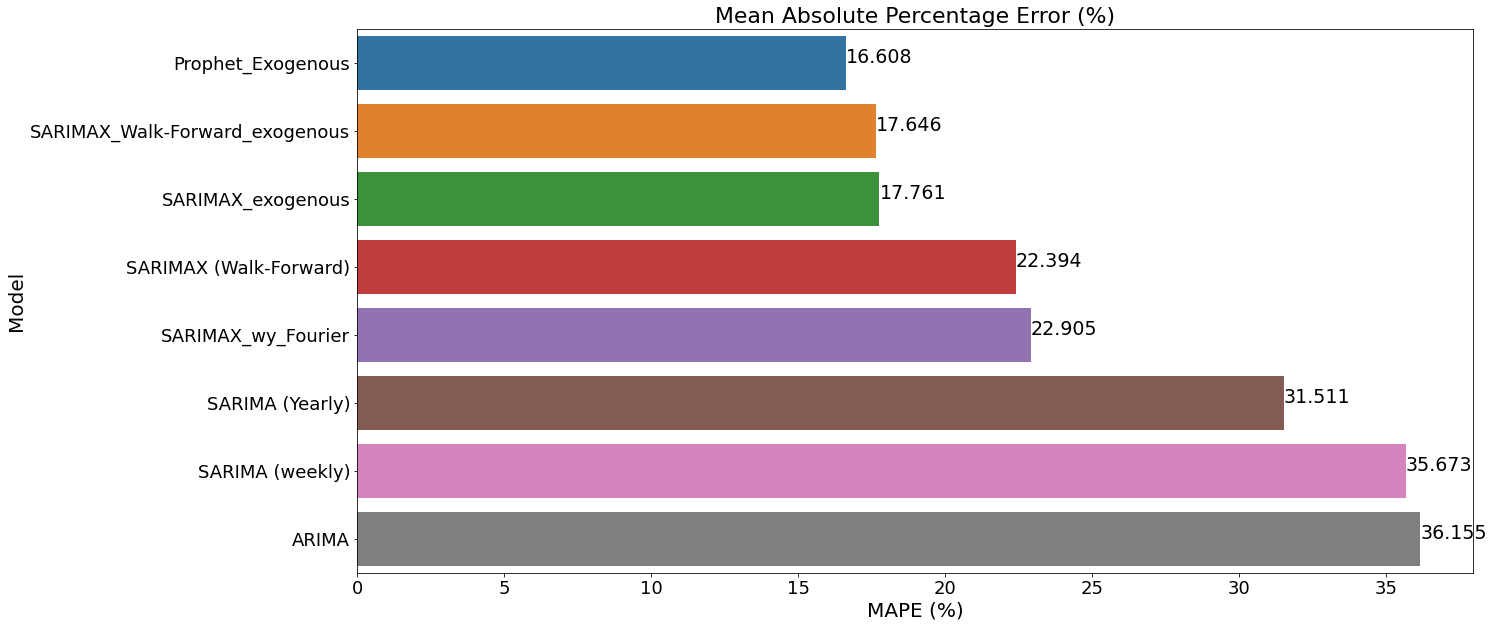

In [187]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'MAPE (%)', y = 'Model', data = mape, orient = 'h')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel('Model', fontsize = 20)
plt.xlabel('MAPE (%)', fontsize = 20)

plt.title('Mean Absolute Percentage Error (%)', fontsize = 22)
for index, value in enumerate(mape['MAPE (%)']):
    plt.text(value, index, str(round(value,3)), fontsize = 19)

plt.show()

In [199]:
rmse = table.sort_values(by=['RMSE'], ascending=True)
rmse

,Model,MAPE (%),R2 Score,RMSE
7,Prophet_Exogenous,16.608320,0.634569,3.520470
6,SARIMAX_Walk-Forward_exogenous,17.646272,0.602823,3.670199
5,SARIMAX_exogenous,17.760725,0.555512,3.882645
4,SARIMAX (Walk-Forward),22.394449,0.328045,4.773841
3,SARIMAX_wy_Fourier,22.904607,0.266205,4.988673
1,SARIMA (weekly),35.672918,-0.429280,6.962360
0,ARIMA,36.155410,-0.451963,7.017390
2,SARIMA (Yearly),31.511018,-0.498903,7.129918


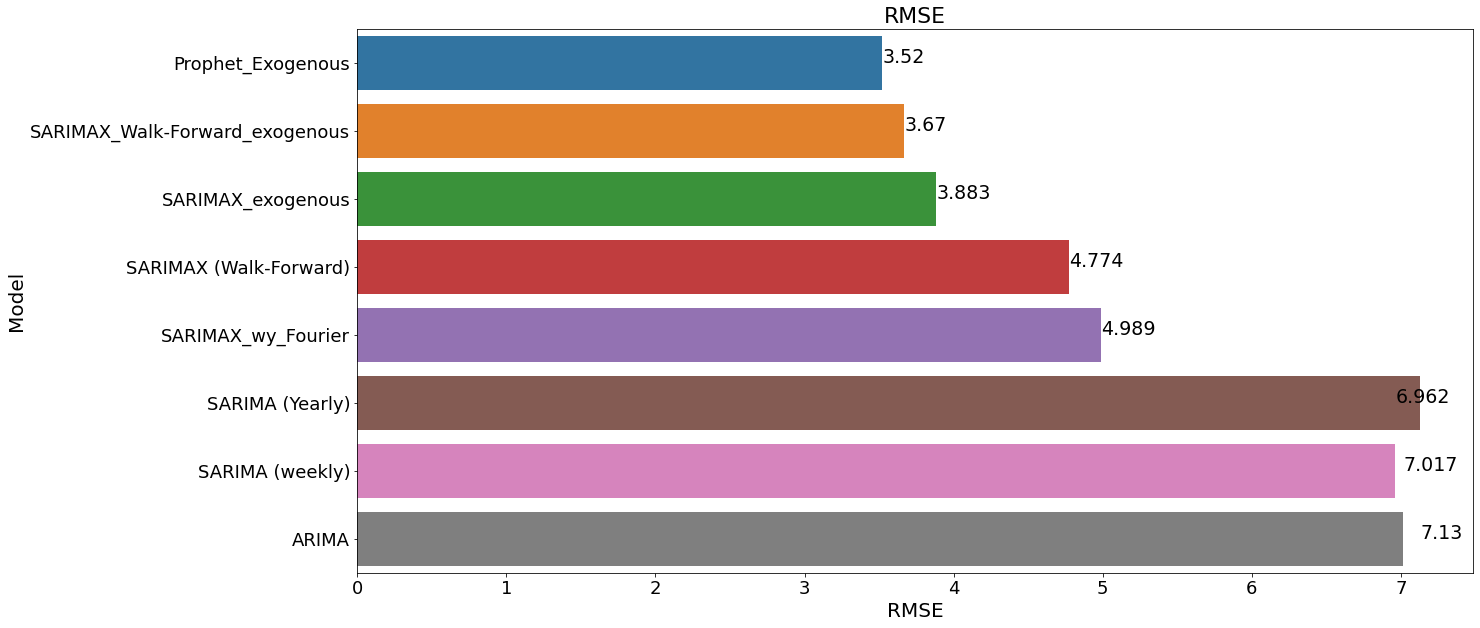

In [200]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'RMSE', y = 'Model', data = mape, orient = 'h')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel('Model', fontsize = 20)
plt.xlabel('RMSE', fontsize = 20)

plt.title('RMSE', fontsize = 22)
for index, value in enumerate(rmse['RMSE']):
    plt.text(value, index, str(round(value,3)), fontsize = 19)

plt.show()

In [156]:
table = pd.DataFrame({'Model': predict.columns})
mape_list = []
r2_list = []
rmse_list = []
mae_list = []

for column in predict.columns:
    print('----',column)
    print(predict.ARIMA.values)
    mape = mean_absolute_percentage_error(actual.values, predict.ARIMA.values)
    print(mape)


---- ARIMA
[26.42168686 21.1206599  21.34208404 24.50623847 23.93319675 25.36919703
 28.70361975 26.66795877 20.98530764 21.58516753 24.36598831 24.18214792
 25.2349139  28.94159646 26.53236699 21.23051475 21.44898262 24.60373559
 24.05437199 25.47607554 28.80540947 26.76967551 21.1040702  21.683196
 24.47234932 24.29447289 25.35059659 29.03463407 26.64281058 21.34055465
 21.55571166 24.70144922 24.1752988  25.58316934 28.90702915 26.87157042
 21.22260459 21.78146667 24.57851644 24.40695855 25.46608683 29.12790787
 26.75302753 21.45076993 21.66228064 24.7993698  24.29598691 25.69046873
 29.00848821 26.97363419 21.34092028 21.87996992 24.68449913 24.51959568
 25.58139383 29.22140847 26.86302728 21.56115134 21.76869858 24.89748824
 24.41644562 25.79796445 29.10979566 27.07585796 21.45902628 21.9786966
 24.79030644 24.6323755  25.69652633 29.31512693 26.97281884 21.6716901
 21.87497407 24.99579585 24.53668379 25.90564769 29.21096007 27.17823325
 21.57693123 22.07763793 24.89594696 24.7452

In [157]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
# Evaluation metrics
# MAPE mean_absolute_percentage_error
def regMAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1.))) * 100


# print_error
def regPrintErr(y_true, y_pred):
    print('R2 Score: {}'.format(r2_score(y_true, y_pred)))
    print('MAPE: {}'.format(regMAPE(y_true, y_pred)))
    print('RMSE: {}'.format(sqrt(mean_squared_error(y_true, y_pred))))

In [165]:
regPrintErr(results.Actual,results.ARIMA)

R2 Score: -0.45196348471557335
MAPE: 36.15541004539122
RMSE: 7.017389839237427


In [169]:
regPrintErr(results.Actual,results['SARIMA (weekly)'])

R2 Score: -0.4292802725175622
MAPE: 35.67291767988715
RMSE: 6.962359691586313


In [163]:
regPrintErr(results.Actual,results.Prophet_Exogenous)

R2 Score: 0.6345687552988031
MAPE: 16.60832040729678
RMSE: 3.520469572440219


In [172]:
regPrintErr(actual.Actual,results.Prophet_Exogenous)

R2 Score: 0.6345687552988031
MAPE: 16.60832040729678
RMSE: 3.520469572440219


In [174]:
predict['ARIMA']

date
2017-10-01    26.421687
2017-10-02    21.120660
2017-10-03    21.342084
2017-10-04    24.506238
2017-10-05    23.933197
                ...    
2017-12-27    25.094284
2017-12-28    24.656710
2017-12-29    26.013510
2017-12-30    29.311990
2017-12-31    27.280752
Name: ARIMA, Length: 92, dtype: float64

In [177]:
actual.Actual

date
2017-10-01    21
2017-10-02    12
2017-10-03    18
2017-10-04    15
2017-10-05    20
              ..
2017-12-27    14
2017-12-28    19
2017-12-29    15
2017-12-30    27
2017-12-31    23
Name: Actual, Length: 92, dtype: int64

In [175]:
results.Prophet_Exogenous

date
2017-10-01    20.652185
2017-10-02    17.074962
2017-10-03    18.135811
2017-10-04    19.166719
2017-10-05    19.238957
                ...    
2017-12-27    13.003413
2017-12-28    14.600263
2017-12-29    14.684450
2017-12-30    25.106726
2017-12-31    16.121971
Name: Prophet_Exogenous, Length: 92, dtype: float64